## Task 4- To Explore Decision Tree Algorithm

- Manoj Deshmukh - Intern The Sparks Foundation

#### Problem Statement- From the given 'Iris' dataset, predict species using given independent variables by using decision tree algorithm.

Import the required libraries

In [93]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report as cr
from sklearn.metrics import confusion_matrix
import seaborn as sns
from io import StringIO
import pydotplus
from IPython.display import Image

### Read the given dataset

In [94]:
path="E:\\Data Analysis\\The_sparks_foundation\\Task_4\\iris.csv"
iris=pd.read_csv(path)
print('Dataset Loaded successfully ')

Dataset Loaded successfully 


### Info about Iris dataset

In [95]:
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [96]:
print('Shape of Iris Dataset:', iris.shape)
iris.columns

Shape of Iris Dataset: (150, 6)


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

Remove insignificant features

In [97]:
iris=iris.drop(['Id'],axis=1)

Get value count of dependent variable

In [98]:
iris.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

### Data Cleansing

Check for zero, Null, Blank check

In [99]:
print('Zero check')
iris[iris==0].count()

Zero check


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [100]:
print('NULL check')
iris.isnull().sum()

NULL check


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [101]:
print('Blank check')
iris[iris==' '].count()

Blank check


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Multicollinearity check

Check for multi-collinearity in independent variables

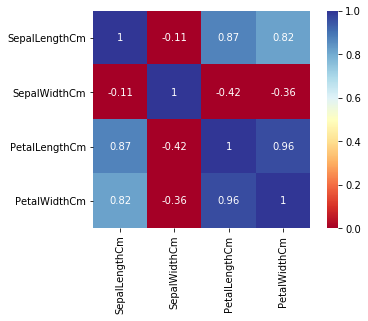

In [102]:
cols=iris.columns
totalcols=len(iris.columns)
cor=iris.iloc[:,0:totalcols-1].corr()
sns.heatmap(cor,xticklabels=cols[0:totalcols-1],
 yticklabels=cols[0:totalcols-1], cmap='RdYlBu',
 annot=True,vmin=0,vmax=1,square=True)

### PairWise Plot

 Relationship between all pairs of numeric variables

<Figure size 800x640 with 0 Axes>

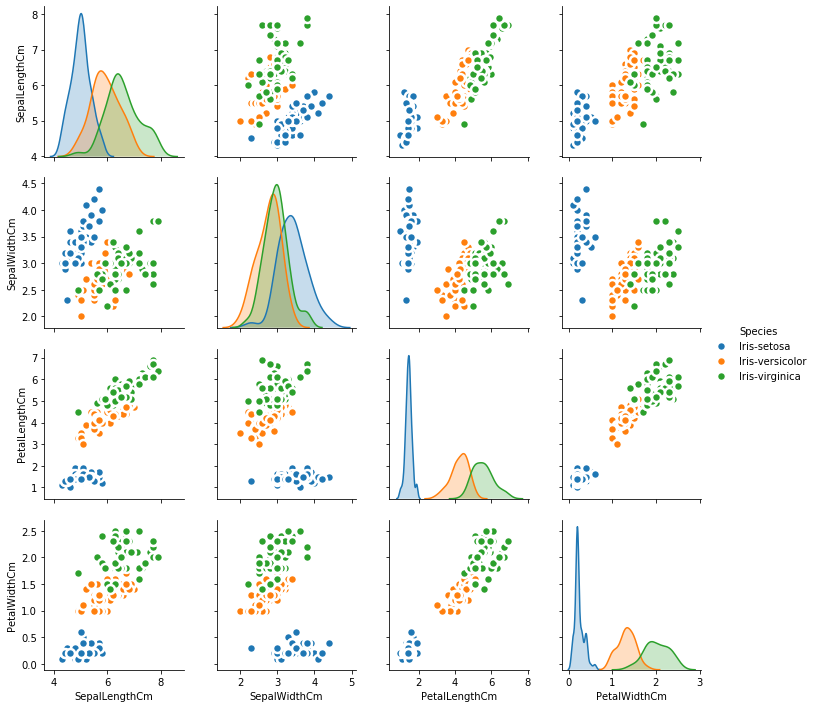

In [103]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(iris, kind="scatter", hue="Species", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

### Outliers

Check for outliers

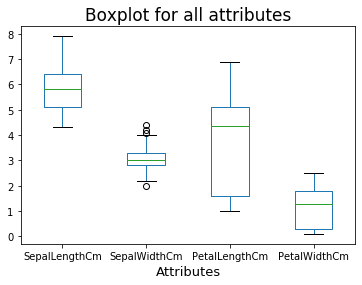

In [104]:
iris.plot.box()
plt.xlabel("Attributes", fontsize=13) 
plt.title("Boxplot for all attributes", fontsize=17) 
plt.show() 

### Model Building

Split the dataset into dependent and independent variables

In [105]:
iris=iris.sample(frac=1)

train,test=train_test_split(iris,test_size=0.3)
print("train={},test={}".format(train.shape,test.shape))

train=(105, 5),test=(45, 5)


Split dataset into train and test

In [106]:
trainX=train.iloc[:,0:totalcols-1]
trainY=train.iloc[:,totalcols-1]
testX=test.iloc[:,0:totalcols-1]
testY=test.iloc[:,totalcols-1]
print("trainX={},trainY={},testX={},testY".format(trainX.shape,trainY.shape,testX.shape,testY.shape))

trainX=(105, 4),trainY=(105,),testX=(45, 4),testY


In [107]:
dt=dtc(criterion="gini", random_state=100, min_samples_leaf=1).fit(trainX,trainY)
print('Model Build successfully.')

Model Build successfully.


### Decision Tree

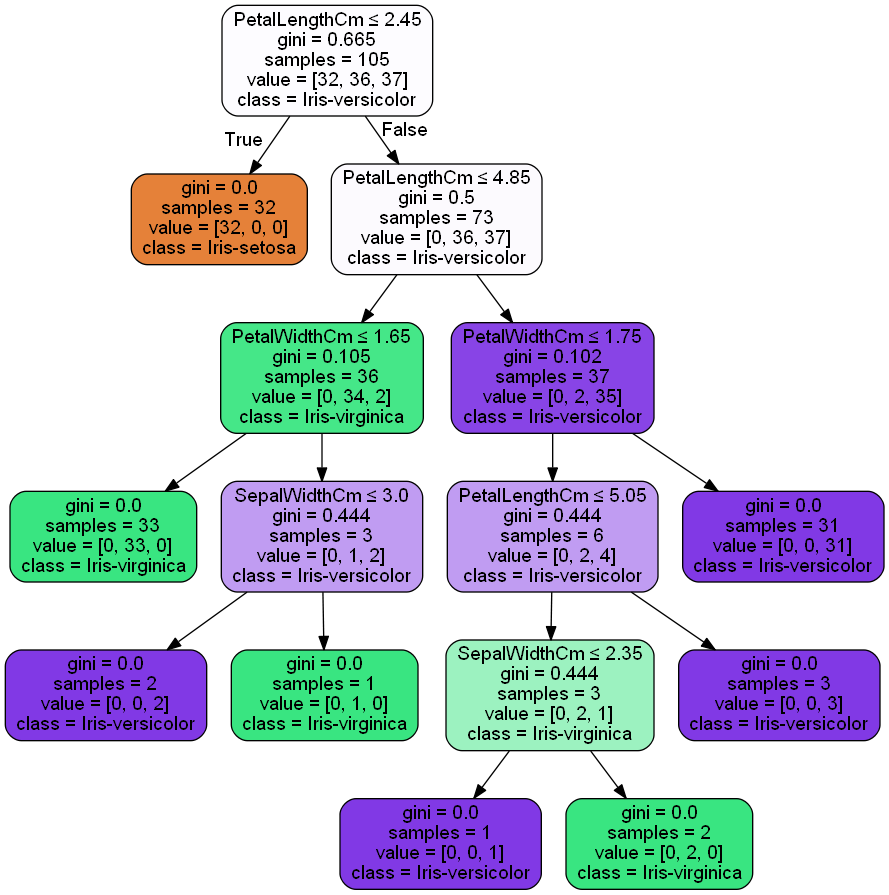

In [108]:
classes=iris.Species.unique()
dot_data=StringIO()
tree.export_graphviz(dt,out_file=dot_data,
                     filled=True,
                     rounded=True,
                     special_characters=True,
                     feature_names=cols[0:totalcols-1],
                     class_names=classes)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Prediction

Predict the species using model

In [109]:
predY=dt.predict(testX)

### Evaluation

Evaluate the decision tree model

In [110]:
print('Confusion Matrix:')
print(confusion_matrix(testY, predY))
print('Accuracy of Model:', round(accuracy_score(testY, predY)*100, 2))

Confusion Matrix:
[[18  0  0]
 [ 0 13  1]
 [ 0  0 13]]
Accuracy of Model: 97.78


Store actual and predicted species in a dataframe to compare

In [111]:
pred_species={'Actual':testY,'Prediction':predY}
pred_species=pd.DataFrame(pred_species)
pred_species.head(10)

,Actual,Prediction
6,Iris-setosa,Iris-setosa
81,Iris-versicolor,Iris-versicolor
148,Iris-virginica,Iris-virginica
35,Iris-setosa,Iris-setosa
22,Iris-setosa,Iris-setosa
137,Iris-virginica,Iris-virginica
93,Iris-versicolor,Iris-versicolor
10,Iris-setosa,Iris-setosa
61,Iris-versicolor,Iris-versicolor
63,Iris-versicolor,Iris-versicolor


###### The predictions can be made on different data using decision tree model

## Thank You!